In [ ]:
!pip install xgboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('train.csv')

df_no_claim = df[df['is_claim'] == 0]
df_claim = df[df['is_claim'] == 1]

print(f"\nNo Claim samples: {len(df_no_claim)}")
print(f"Claim samples: {len(df_claim)}")


n_samples = len(df_claim)
df_no_claim_sampled = df_no_claim.sample(n=n_samples + 1500, random_state=42)
df_claim_sampled = df_claim.sample(n=n_samples, random_state=42)

df_balanced = pd.concat([df_no_claim_sampled, df_claim_sampled])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"\nBalanced data shape: {df_balanced.shape}")
print(f"Balanced class distribution:\n{df_balanced['is_claim'].value_counts()}")

df = df_balanced


No Claim samples: 54844
Claim samples: 3748

Balanced data shape: (8996, 44)
Balanced class distribution:
is_claim
0    5248
1    3748
Name: count, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8996 entries, 0 to 8995
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         8996 non-null   object 
 1   policy_tenure                     8996 non-null   float64
 2   age_of_car                        8996 non-null   float64
 3   age_of_policyholder               8996 non-null   float64
 4   area_cluster                      8996 non-null   object 
 5   population_density                8996 non-null   int64  
 6   make                              8996 non-null   int64  
 7   segment                           8996 non-null   object 
 8   model                             8996 non-null   object 
 9   fuel_type                         8996 non-null   object 
 10  max_torque                        8996 non-null   object 
 11  max_power                         8996 non-null   object 
 12  engine

In [ ]:
df.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,8996.000000,8996.000000,8996.000000,8996.000000,8996.000000,8996.000000,8996.000000,8996.000000,8996.000000,8996.000000,8996.000000,8996.000000,8996.000000,8996.000000,8996.000000,8996.000000
mean,0.657265,0.067333,0.470324,18293.804024,1.762672,3.120165,1164.933526,3.635949,5.239773,4.852751,3851.974878,1673.403735,1552.942308,1383.749222,1.772232,0.416630
std,0.410670,0.055441,0.122304,17085.185724,1.143330,1.824882,264.232543,0.481190,0.426969,0.225862,308.223595,111.164689,79.214924,211.056077,1.382182,0.493028
min,0.002816,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.000000,1051.000000,0.000000,0.000000
25%,0.261857,0.020000,0.375000,6112.000000,1.000000,2.000000,998.000000,3.000000,5.000000,4.600000,3655.000000,1515.000000,1490.000000,1185.000000,0.000000,0.000000
50%,0.658288,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.000000,1335.000000,2.000000,0.000000
75%,1.060625,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.000000,1510.000000,3.000000,1.000000
max,1.335945,1.000000,0.951923,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.000000,1720.000000,5.000000,1.000000


In [ ]:
df.isnull().sum()

,0
policy_id,0
policy_tenure,0
age_of_car,0
age_of_policyholder,0
area_cluster,0
population_density,0
make,0
segment,0
model,0
fuel_type,0


In [ ]:
df.nunique()

,0
policy_id,8996
policy_tenure,8996
age_of_car,37
age_of_policyholder,66
area_cluster,22
population_density,22
make,5
segment,6
model,11
fuel_type,3


In [ ]:
df.shape

(8996, 44)

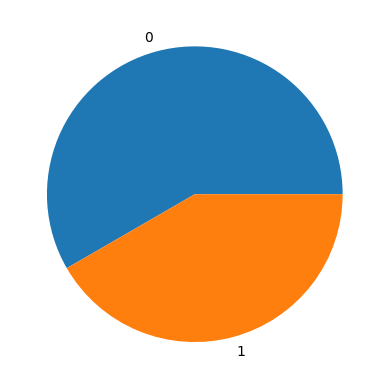

In [ ]:
plt.pie(df['is_claim'].value_counts(),labels = df['is_claim'].value_counts().index.tolist())
plt.show()

corellation

In [ ]:
df.head(20)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID15097,1.032123,0.08,0.288462,C8,8794,1,B1,M8,CNG,...,No,Yes,Yes,Yes,No,No,Yes,Yes,2,0
1,ID35296,0.431529,0.11,0.307692,C8,8794,5,C1,M9,Diesel,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,ID34659,1.070134,0.01,0.509615,C3,4076,1,B1,M8,CNG,...,No,Yes,Yes,Yes,No,No,Yes,Yes,2,1
3,ID25689,0.641168,0.01,0.509615,C7,6112,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
4,ID30048,0.360127,0.13,0.394231,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
5,ID55803,0.911800,0.06,0.394231,C2,27003,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,1
6,ID35812,1.001284,0.16,0.490385,C12,34791,3,C2,M4,Diesel,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
7,ID38050,1.066834,0.01,0.644231,C3,4076,1,B1,M8,CNG,...,No,Yes,Yes,Yes,No,No,Yes,Yes,2,1
8,ID43954,0.551909,0.07,0.490385,C3,4076,3,C2,M4,Diesel,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,1
9,ID04506,0.686979,0.06,0.500000,C5,34738,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,1


In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns identified: {categorical_cols}")

Categorical columns identified: ['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'transmission_type', 'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']


In [ ]:
df['area_cluster']

,area_cluster
0,C8
1,C8
2,C3
3,C7
4,C8
...,...
8991,C8
8992,C3
8993,C8
8994,C2


In [ ]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [ ]:
df

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,...,is_rear_window_washer_Yes,is_rear_window_defogger_Yes,is_brake_assist_Yes,is_power_door_locks_Yes,is_central_locking_Yes,is_power_steering_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_ecw_Yes,is_speed_alert_Yes
0,1.032123,0.08,0.288462,8794,1,2,998,3,5,4.7,...,False,False,False,True,True,True,False,False,True,True
1,0.431529,0.11,0.307692,8794,5,2,1498,4,5,4.9,...,False,True,False,True,True,True,True,True,True,True
2,1.070134,0.01,0.509615,4076,1,2,998,3,5,4.7,...,False,False,False,True,True,True,False,False,True,True
3,0.641168,0.01,0.509615,6112,1,2,796,3,5,4.6,...,False,False,False,False,False,True,False,False,False,True
4,0.360127,0.13,0.394231,8794,1,2,1197,4,5,4.8,...,False,False,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8991,1.085658,0.14,0.355769,8794,3,6,1493,4,6,5.2,...,True,True,True,True,True,True,True,False,True,True
8992,0.881341,0.07,0.519231,4076,1,2,998,3,5,4.7,...,False,False,False,True,True,True,False,False,True,True
8993,1.163969,0.07,0.721154,8794,1,2,1197,4,5,4.8,...,False,False,True,True,True,True,True,True,True,True
8994,0.137628,0.08,0.326923,27003,1,2,1197,4,5,4.8,...,False,False,True,True,True,True,True,True,True,True


<Axes: xlabel='age_of_car'>

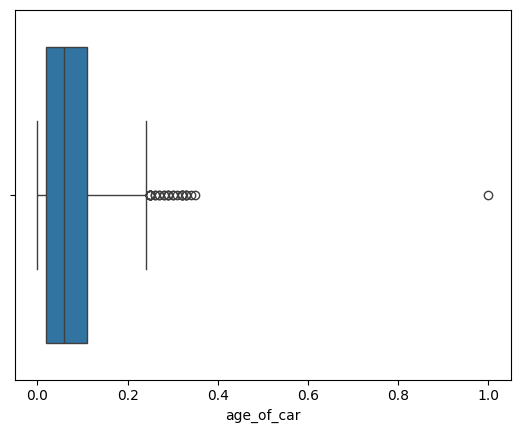

In [ ]:
import seaborn as sns
sns.boxplot(x='age_of_car', data=df)

In [ ]:
Q1 = df['age_of_car'].quantile(0.25)
Q3 = df['age_of_car'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df[(df['age_of_car'] >= lower_bound) & (df['age_of_car'] <= upper_bound)]

print(f'New dataset shape: {df_clean.shape}')

New dataset shape: (8966, 9096)


<Axes: xlabel='age_of_car'>

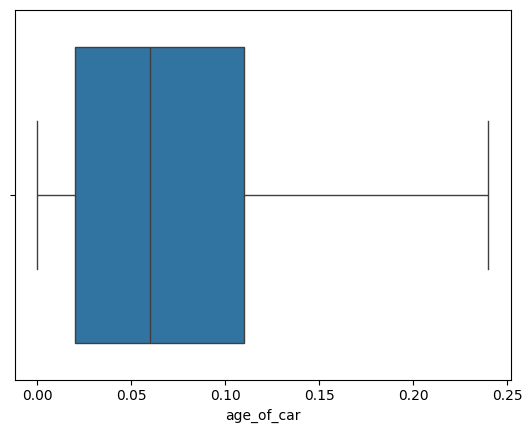

In [ ]:
sns.boxplot(x='age_of_car', data=df_clean)

<Axes: xlabel='age_of_car', ylabel='Count'>

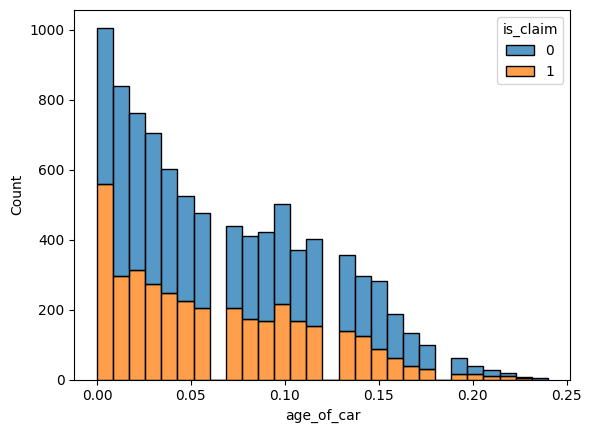

In [ ]:
sns.histplot(data=df_clean, x="age_of_car", hue="is_claim", multiple="stack")

<Axes: xlabel='policy_tenure', ylabel='Count'>

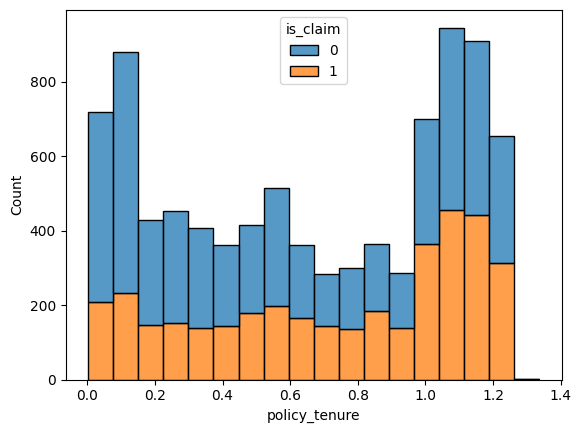

In [ ]:
sns.histplot(data=df, x="policy_tenure", hue="is_claim", multiple="stack")

In [ ]:
df_clean.head(10)

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,...,is_rear_window_washer_Yes,is_rear_window_defogger_Yes,is_brake_assist_Yes,is_power_door_locks_Yes,is_central_locking_Yes,is_power_steering_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_ecw_Yes,is_speed_alert_Yes
0,1.032123,0.08,0.288462,8794,1,2,998,3,5,4.7,...,False,False,False,True,True,True,False,False,True,True
1,0.431529,0.11,0.307692,8794,5,2,1498,4,5,4.9,...,False,True,False,True,True,True,True,True,True,True
2,1.070134,0.01,0.509615,4076,1,2,998,3,5,4.7,...,False,False,False,True,True,True,False,False,True,True
3,0.641168,0.01,0.509615,6112,1,2,796,3,5,4.6,...,False,False,False,False,False,True,False,False,False,True
4,0.360127,0.13,0.394231,8794,1,2,1197,4,5,4.8,...,False,False,True,True,True,True,True,True,True,True
5,0.911800,0.06,0.394231,27003,1,2,1197,4,5,4.8,...,False,False,True,True,True,True,True,True,True,True
6,1.001284,0.16,0.490385,34791,3,6,1493,4,6,5.2,...,True,True,True,True,True,True,True,False,True,True
7,1.066834,0.01,0.644231,4076,1,2,998,3,5,4.7,...,False,False,False,True,True,True,False,False,True,True
8,0.551909,0.07,0.490385,4076,3,6,1493,4,6,5.2,...,True,True,True,True,True,True,True,False,True,True
9,0.686979,0.06,0.500000,34738,1,2,796,3,5,4.6,...,False,False,False,False,False,True,False,False,False,True


In [ ]:
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix

X = df_clean.drop('is_claim', axis = 1)
y = df_clean['is_claim']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [ ]:
y_train.value_counts()

,count
is_claim,
0,3659
1,2617


In [ ]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(sampling_strategy=0.2, random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
df['is_claim']

,is_claim
0,0
1,0
2,1
3,0
4,0
...,...
8991,1
8992,0
8993,1
8994,0


In [ ]:
from sklearn.preprocessing import StandardScaler
numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()

if 'is_claim' in numeric_cols:
    numeric_cols.remove('is_claim')

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [ ]:
X_train.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,...,is_rear_window_washer_Yes,is_rear_window_defogger_Yes,is_brake_assist_Yes,is_power_door_locks_Yes,is_central_locking_Yes,is_power_steering_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_ecw_Yes,is_speed_alert_Yes
8692,1.083619,-0.693282,-0.465482,-0.020425,1.084068,1.581003,1.242786,0.758225,1.777370,1.535238,...,True,True,True,True,True,True,True,False,True,True
8547,-0.050612,-1.254176,0.402609,-0.825577,-0.667634,-0.613848,-1.395451,-1.318869,-0.562629,-1.122857,...,False,False,False,False,False,True,False,False,False,True
6036,-0.022734,-0.880247,-0.228730,0.519099,-0.667634,-0.613848,-1.395451,-1.318869,-0.562629,-1.122857,...,False,False,False,False,False,True,False,False,False,True
442,1.055781,-0.319353,0.323692,-0.548865,-0.667634,-0.613848,-1.395451,-1.318869,-0.562629,-1.122857,...,False,False,False,False,False,True,False,False,False,True
165,-0.821070,-0.319353,-0.860069,-0.771970,-0.667634,-0.613848,-1.395451,-1.318869,-0.562629,-1.122857,...,False,False,False,False,False,True,False,False,False,True


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


log = LogisticRegression()
log.fit(X_train, y_train)



logistic_pred = log.predict(X_train)
logistic_accuracy = accuracy_score(logistic_pred, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(f"The accuracy for LogisticRegression is: {logistic_accuracy}")

The accuracy for LogisticRegression is: 0.8731676226896112


In [ ]:
from sklearn.metrics import classification_report

y_pred = log.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.82      0.70      1568
           1       0.53      0.30      0.38      1122

    accuracy                           0.60      2690
   macro avg       0.58      0.56      0.54      2690
weighted avg       0.58      0.60      0.57      2690



SVM

In [ ]:
from sklearn.svm import LinearSVC

svm = LinearSVC(
    C=1,
    class_weight='balanced',
    max_iter=5000,
    random_state=42
)

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.74      0.68      1568
           1       0.53      0.42      0.47      1122

    accuracy                           0.60      2690
   macro avg       0.59      0.58      0.58      2690
weighted avg       0.59      0.60      0.59      2690



Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=6,
    min_samples_leaf=30,
    min_samples_split=60,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

rf_pred = rf.predict(X_train)
rf_accuracy = accuracy_score(rf_pred, y_train)

In [ ]:
print(f"The accuracy for RandomForest is: {rf_accuracy}")

The accuracy for RandomForest is: 0.5830146590184832


In [ ]:
from sklearn.metrics import roc_auc_score, classification_report

y_proba = rf.predict_proba(X_test)[:, 1]
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

ROC-AUC: 0.5901909059078176


In [ ]:
print("Min:", y_proba.min())
print("Max:", y_proba.max())
print("Mean:", y_proba.mean())


Min: 0.40366664800196594
Max: 0.42669866371808274
Mean: 0.41656578305689257


In [ ]:
from xgboost import XGBClassifier

scale_pos_weight = len(y_train[y_train==0]) / len(y_train[y_train==1])

xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:15:56] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=-1,
              num_parallel_tree=None, ...)

In [ ]:
y_pred = xgb.predict(X_test)

y_proba = xgb.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.67      0.60      0.63      1568
           1       0.51      0.59      0.55      1122

    accuracy                           0.59      2690
   macro avg       0.59      0.59      0.59      2690
weighted avg       0.60      0.59      0.59      2690

ROC-AUC: 0.6198340131507148


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    random_state=42
)

gb.fit(X_train, y_train)

gb_pred = gb.predict(X_train)
gb_accuracy = accuracy_score(gb_pred, y_train)

In [ ]:
print(f"The accuracy for GradientBoosting is: {gb_accuracy}")

The accuracy for GradientBoosting is: 0.6596558317399618


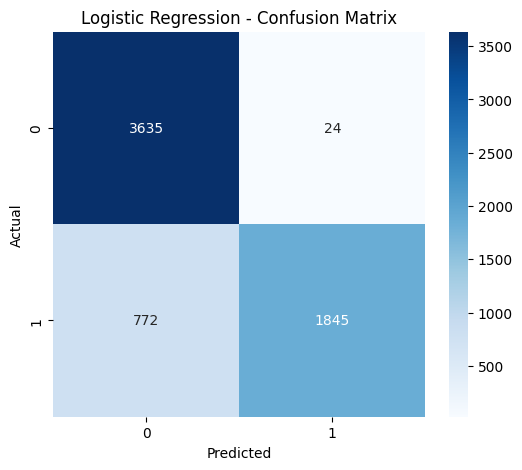

Logistic Regression Test Accuracy: 0.8732



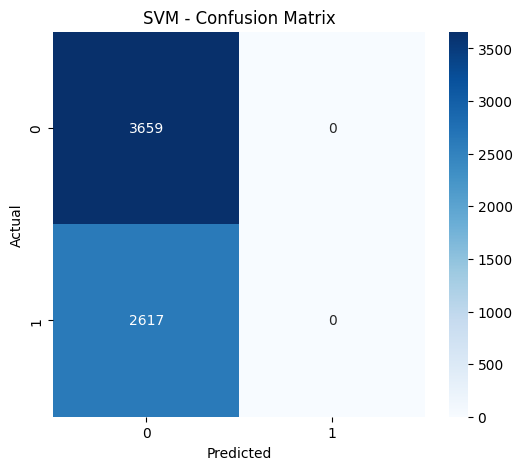

 SVM Test Accuracy: 1.0000



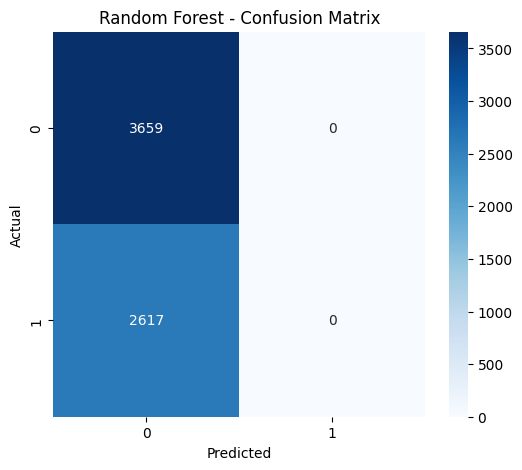

Random Forest Test Accuracy: 0.5830



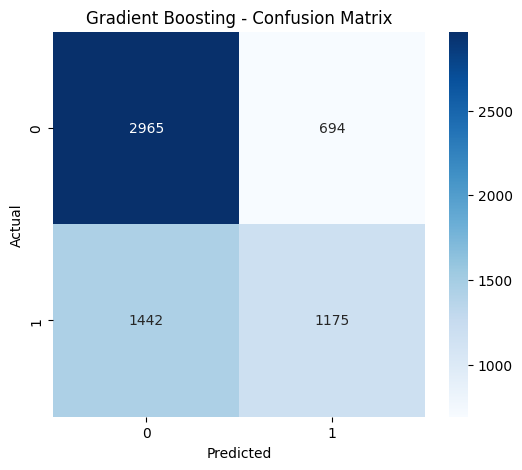

Gradient Boosting Test Accuracy: 0.6597


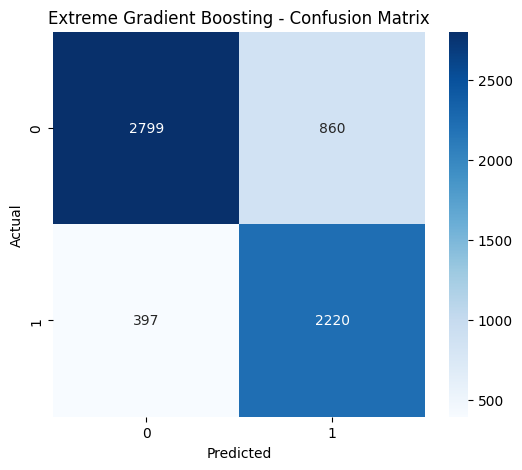

Extreme Gradient Boosting Test Accuracy: 0.7997


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

logistic_pred_test = log.predict(X_train)
svm_pred_test = svm.predict(X_train)
rf_pred_test = rf.predict(X_train)
gb_pred_test = gb.predict(X_train)
xgb_pred_test = xgb.predict(X_train)

# Logistic Regression Confusion Matrix
cm_logistic = confusion_matrix(y_train, logistic_pred_test)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(f"Logistic Regression Test Accuracy: {accuracy_score(y_train, logistic_pred_test):.4f}\n")

# SVM Confusion Matrix
cm_svm = confusion_matrix(y_train, svm_pred_test)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('SVM - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(f" SVM Test Accuracy: {accuracy_score(y_train, svm_pred_test):.4f}\n")

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_train, rf_pred_test)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(f"Random Forest Test Accuracy: {accuracy_score(y_train, rf_pred_test):.4f}\n")

# Gradient Boosting Confusion Matrix
cm_gb = confusion_matrix(y_train, gb_pred_test)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues')
plt.title('Gradient Boosting - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(f"Gradient Boosting Test Accuracy: {accuracy_score(y_train, gb_pred_test):.4f}")

# Extreme Gradient Boosting Confusion Matrix
cm_xgb = confusion_matrix(y_train, xgb_pred_test)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Extreme Gradient Boosting - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(f"Extreme Gradient Boosting Test Accuracy: {accuracy_score(y_train, xgb_pred_test):.4f}")

In [ ]:
from sklearn.ensemble import VotingClassifier


voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('log', log)
    ],
    voting='soft'
)

voting_clf.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=6,
                                                     min_samples_leaf=30,
                                                     min_samples_split=60,
                                                     n_estimators=400,
                                                     n_jobs=-1,
                                                     random_state=42)),
                             ('log', LogisticRegression())],
                 voting='soft')

In [ ]:
voting_pred = voting_clf.predict(X_train)
voting_accuracy = accuracy_score(voting_pred, y_train)

In [ ]:
print(f"The accuracy for VotingClassifier is: {voting_accuracy}")

The accuracy for VotingClassifier is: 0.7367750159337157


In [ ]:
from sklearn.metrics import classification_report

y_pred = log.predict(X_test)
print("Logistic Regression \n" + classification_report(y_test, y_pred))

y_pred = svm.predict(X_test)
print("SVM \n" + classification_report(y_test, y_pred))

y_pred = rf.predict(X_test)
print("RandomForest \n" + classification_report(y_test, y_pred))

y_pred = gb.predict(X_test)
print("Gradient Boositng \n" + classification_report(y_test, y_pred))

y_pred = xgb.predict(X_test)
print("XGBoost \n" + classification_report(y_test, y_pred))

y_pred = voting_clf.predict(X_test)
print("Voting Classifier \n" + classification_report(y_test, y_pred))

Logistic Regression 
              precision    recall  f1-score   support

           0       0.62      0.82      0.70      1568
           1       0.53      0.30      0.38      1122

    accuracy                           0.60      2690
   macro avg       0.58      0.56      0.54      2690
weighted avg       0.58      0.60      0.57      2690

SVM 
              precision    recall  f1-score   support

           0       0.64      0.74      0.68      1568
           1       0.53      0.42      0.47      1122

    accuracy                           0.60      2690
   macro avg       0.59      0.58      0.58      2690
weighted avg       0.59      0.60      0.59      2690



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


RandomForest 
              precision    recall  f1-score   support

           0       0.58      1.00      0.74      1568
           1       0.00      0.00      0.00      1122

    accuracy                           0.58      2690
   macro avg       0.29      0.50      0.37      2690
weighted avg       0.34      0.58      0.43      2690

Gradient Boositng 
              precision    recall  f1-score   support

           0       0.64      0.77      0.70      1568
           1       0.56      0.40      0.47      1122

    accuracy                           0.62      2690
   macro avg       0.60      0.59      0.59      2690
weighted avg       0.61      0.62      0.61      2690

XGBoost 
              precision    recall  f1-score   support

           0       0.67      0.60      0.63      1568
           1       0.51      0.59      0.55      1122

    accuracy                           0.59      2690
   macro avg       0.59      0.59      0.59      2690
weighted avg       0.60      0.5